In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'synthetic_sickle_cbc_updated2.xlsx' 
cbc_data = pd.read_excel(file_path)

# Explore the dataset
print("First 5 rows:")
print(cbc_data.head())

print("\nDataset Information:")
print(cbc_data.info())

First 5 rows:
   Timestamp  ID    WBC   LYMp   MIDp  NEUTp  LYMn  MIDn  NEUTn   RBC  ...  \
0 2003-01-01   1  11.53  43.90  12.76  65.82  2.57  0.98   6.11  3.72  ...   
1 2003-01-08   2   9.70  34.45  11.94  66.37  2.89  0.43   8.58  2.89  ...   
2 2003-01-15   3   8.39  23.52   9.46  42.56  4.42  0.74   2.56  3.00  ...   
3 2003-01-22   4   7.59  23.76  14.43  57.64  2.36  0.13   2.60  2.85  ...   
4 2003-01-29   5   4.94  40.57   4.61  40.87  4.48  0.86   6.23  4.42  ...   

     MCV    MCH   MCHC  RDWSD  RDWCV     PLT    MPV    PDW   PCT   PLCR  
0  94.20  20.79  31.50  40.08  17.41  165.18  10.65  16.31  0.27  36.01  
1  70.50  22.77  33.23  41.18  17.74  316.05   7.92  10.05  0.14  19.59  
2  75.60  22.49  31.94  36.45  24.21  238.48   8.73  11.02  0.20  37.54  
3  89.65  22.35  28.58  38.54  15.77  190.10  10.32  14.30  0.45  27.66  
4  81.27  21.93  29.30  35.77  21.10  381.55   9.41  11.98  0.24  16.68  

[5 rows x 22 columns]

Dataset Information:
<class 'pandas.core.frame.Da

In [18]:
print("\nDescriptive Statistics:")
print(cbc_data.describe())



Descriptive Statistics:
                 Timestamp           ID          WBC         LYMp  \
count                 1250  1250.000000  1250.000000  1250.000000   
mean   2014-12-20 12:00:00   625.500000     7.782176    34.931680   
min    2003-01-01 00:00:00     1.000000     4.030000    20.050000   
25%    2008-12-25 18:00:00   313.250000     5.690000    27.500000   
50%    2014-12-20 12:00:00   625.500000     7.575000    35.120000   
75%    2020-12-14 06:00:00   937.750000     9.357500    42.085000   
max    2026-12-09 00:00:00  1250.000000    13.940000    49.980000   
std                    NaN   360.988227     2.482319     8.611762   

              MIDp        NEUTp         LYMn        MIDn        NEUTn  \
count  1250.000000  1250.000000  1250.000000  1250.00000  1250.000000   
mean      8.462872    49.697384     2.980152     1.03524     5.609768   
min       2.000000    30.000000     1.020000     0.10000     1.500000   
25%       5.212500    39.725000     1.970000     0.57000     

In [19]:
# Check for missing values
print("\nMissing Values:")
print(cbc_data.isnull().sum())


Missing Values:
Timestamp    0
ID           0
WBC          0
LYMp         0
MIDp         0
NEUTp        0
LYMn         0
MIDn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
RDWSD        0
RDWCV        0
PLT          0
MPV          0
PDW          0
PCT          0
PLCR         0
dtype: int64


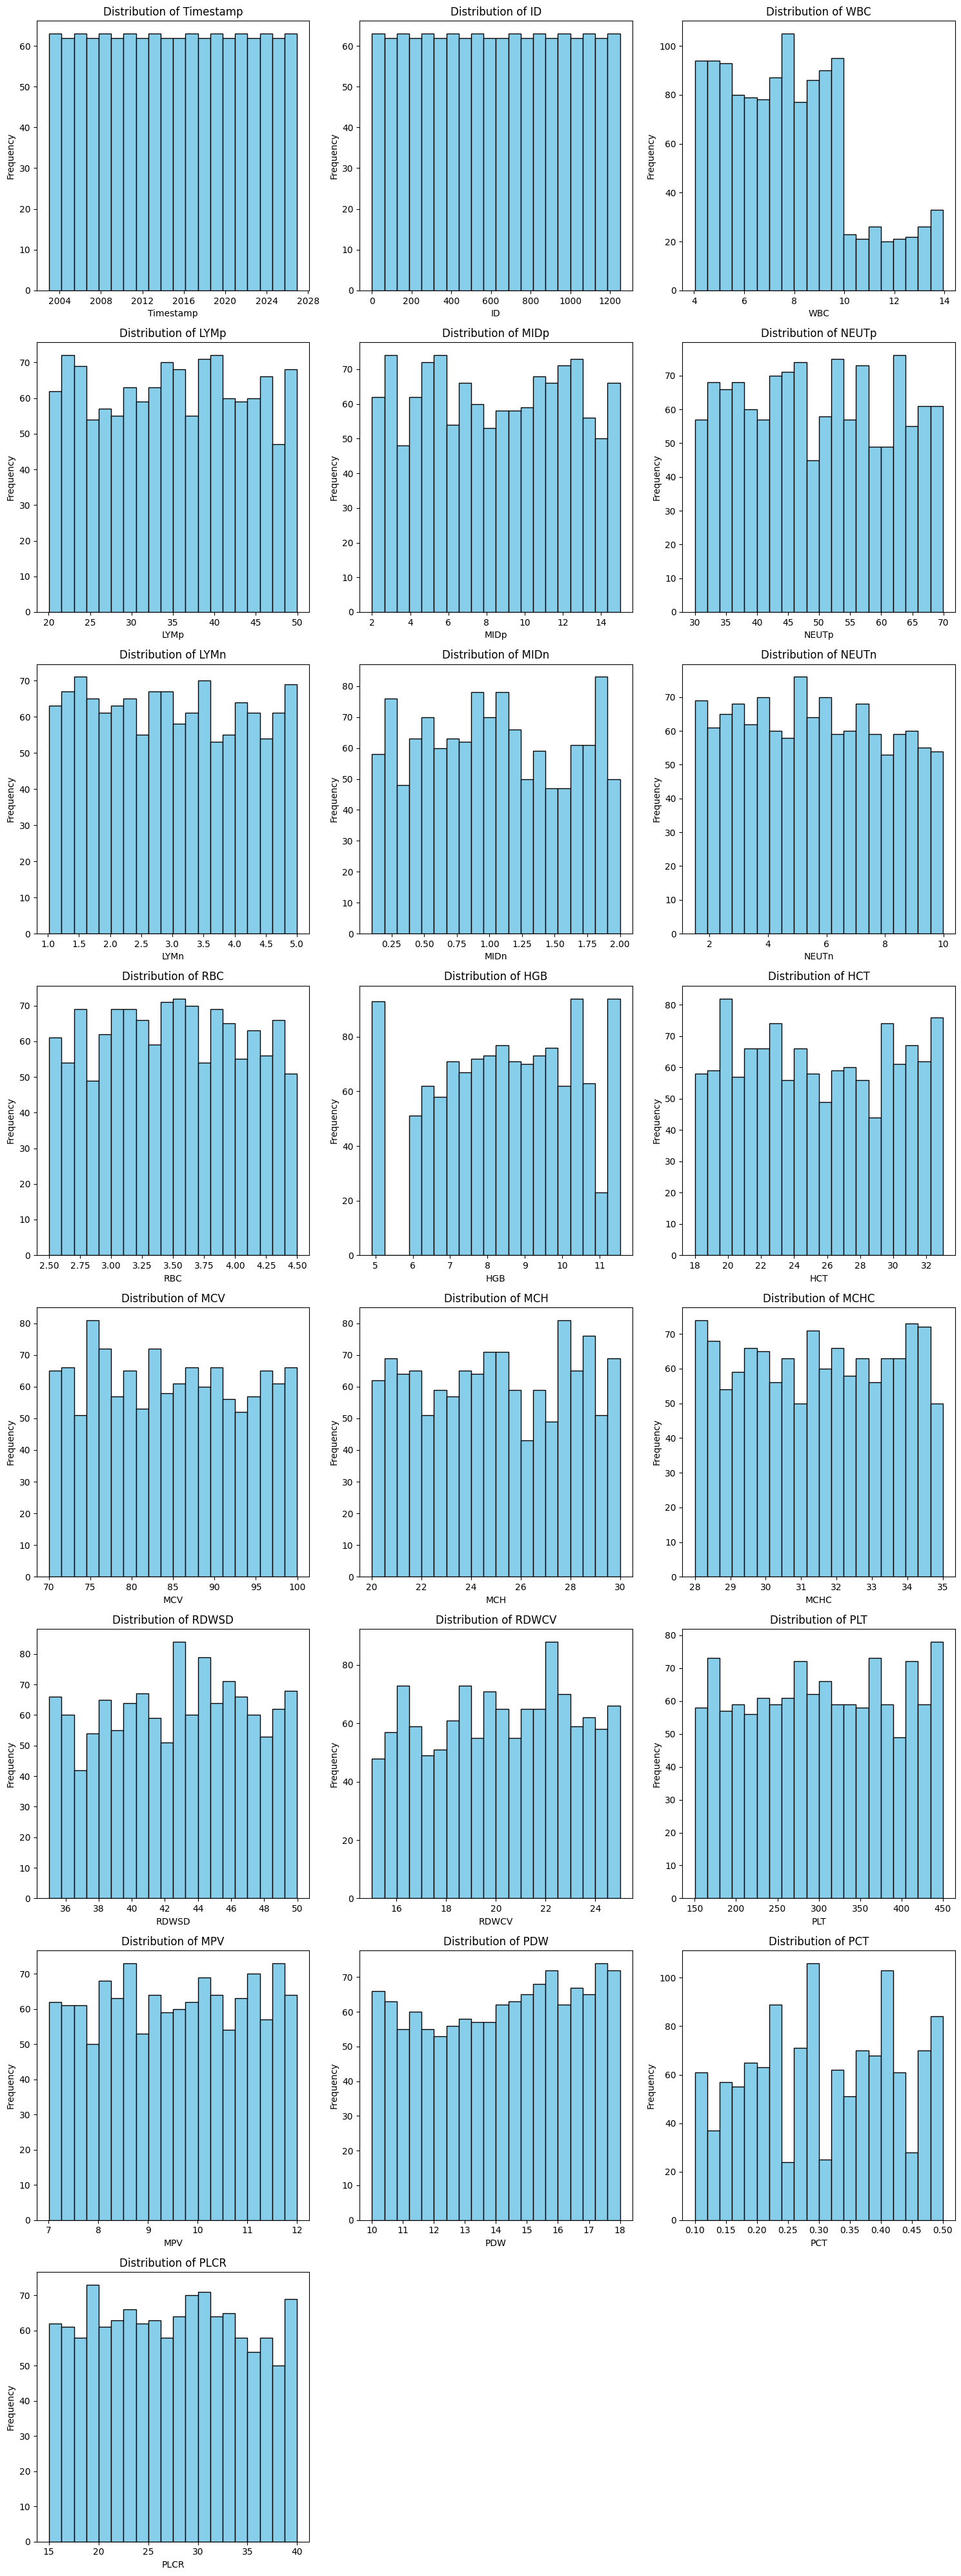

In [20]:
cont_data = cbc_data.select_dtypes(exclude='object')

def plothisto(cont_data):
    num_cols = len(cont_data.columns)  
    rows = int(np.ceil(num_cols / 3))  

    plt.figure(figsize=(15, rows * 5)) 

    for i, col in enumerate(cont_data.columns):
        plt.subplot(rows, 3, i+1)  
        plt.hist(cont_data[col], bins=20, color='skyblue', edgecolor='black') 
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.tight_layout()  
    plt.show()


plothisto(cont_data)

In [21]:
# Select relevant features
features = ['WBC', 'HGB', 'LYMp', 'NEUTp'] 
cbc_data = cbc_data[features]
print("\nSelected Features:")
print(cbc_data.head())


Selected Features:
     WBC   HGB   LYMp  NEUTp
0  11.53  4.91  43.90  65.82
1   9.70  7.66  34.45  66.37
2   8.39  6.88  23.52  42.56
3   7.59  9.04  23.76  57.64
4   4.94  8.38  40.57  40.87


In [22]:
# Define crisis status based on medical thresholds
cbc_data['risk_status'] = np.where((cbc_data['HGB'] > 6) & (cbc_data['WBC'] > 10), 1, 0)

print("\nRisk Status Distribution:")
print(cbc_data['risk_status'].value_counts())



Risk Status Distribution:
risk_status
0    1156
1      94
Name: count, dtype: int64


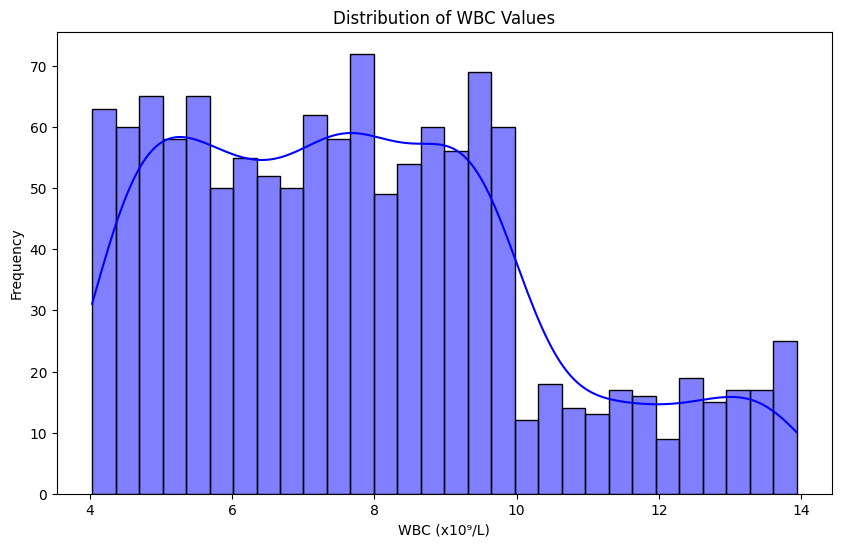

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of WBC values
plt.figure(figsize=(10, 6))
sns.histplot(cbc_data['WBC'], kde=True, bins=30, color='blue')
plt.title('Distribution of WBC Values')
plt.xlabel('WBC (x10⁹/L)')
plt.ylabel('Frequency')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = cbc_data[['WBC', 'HGB', 'LYMp', 'NEUTp']]  
y_risk = cbc_data['risk_status']


X_train, X_test, y_train, y_test = train_test_split(X, y_risk, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Check class distribution before splitting
print("Class distribution (overall):")
print(cbc_data['risk_status'].value_counts())

# Check class distribution in the training set
print("\nClass distribution (training set):")
print(y_train.value_counts())

# Check class distribution in the test set
print("\nClass distribution (test set):")
print(y_test.value_counts())


Class distribution (overall):
risk_status
0    1156
1      94
Name: count, dtype: int64

Class distribution (training set):
risk_status
0    932
1     68
Name: count, dtype: int64

Class distribution (test set):
risk_status
0    224
1     26
Name: count, dtype: int64


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression model
crisis_model = LogisticRegression(class_weight='balanced', random_state=42)
crisis_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = crisis_model.predict(X_test_scaled)
y_pred_prob = crisis_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       0.96      1.00      0.98        26

    accuracy                           1.00       250
   macro avg       0.98      1.00      0.99       250
weighted avg       1.00      1.00      1.00       250



In [27]:
train_accuracy = crisis_model.score(X_train_scaled, y_train)
test_accuracy = crisis_model.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.996
Testing Accuracy: 0.996


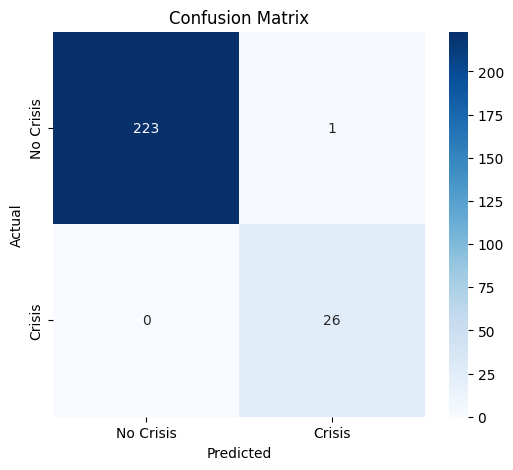

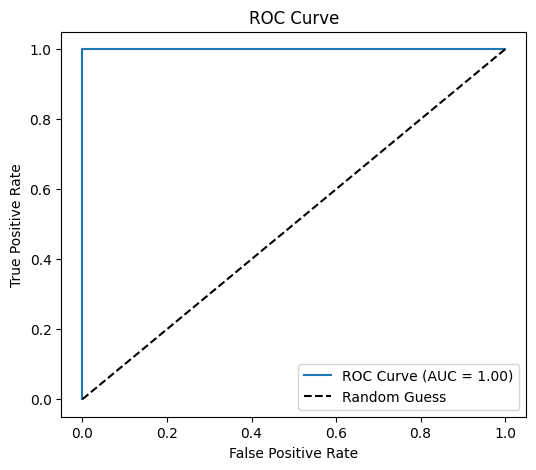

In [28]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()